# Types of Matrix Transformations — Educational Notebook

In this notebook, we'll explore the fundamental types of 2D linear transformations and how different matrices create different geometric effects:

## 🎯 Learning Objectives
- Understand how specific matrix patterns create predictable transformations
- Visualize the geometric meaning of common transformation types
- See how matrix entries directly control transformation behavior
- Build intuition for recognizing transformation types from matrix form

## 📋 Transformation Types Covered
1. **Identity** - No change (baseline)
2. **Scaling** - Stretching/compressing along axes
3. **Reflection** - Mirroring across axes or lines
4. **Inversion** - 180° rotation (point reflection)
5. **Shearing** - Slanting/skewing space
6. **Rotation** - Rotating space around origin

**Key Insight**: Each transformation type has a characteristic matrix pattern that directly determines how space is transformed. Understanding these patterns helps you predict and design transformations.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_transformation(A, title, grid_range=3):
    """
    Plot the effect of transformation matrix A on a unit square and basis vectors.
    
    Parameters:
    A: 2x2 transformation matrix
    title: Title for the plot
    grid_range: Range for x and y axes
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Original basis vectors
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    
    # Apply transformation to basis vectors
    Ae1 = A @ e1
    Ae2 = A @ e2
    
    # Print matrix information
    print(f"Matrix A = \n{A}")
    print(f"det(A) = {np.linalg.det(A):.3f}")
    print(f"Original e1 = {e1} → Transformed = {Ae1}")
    print(f"Original e2 = {e2} → Transformed = {Ae2}")
    print()

    # Plot original basis vectors (gray, lighter appearance)
    ax.quiver(0, 0, e1[0], e1[1], color='gray', angles='xy', scale_units='xy', scale=1, 
              width=0.003, alpha=0.5, label='Original e₁')
    ax.quiver(0, 0, e2[0], e2[1], color='lightgray', angles='xy', scale_units='xy', scale=1, 
              width=0.003, alpha=0.5, label='Original e₂')

    # Plot transformed basis vectors (colored, solid)
    ax.quiver(0, 0, Ae1[0], Ae1[1], color='blue', angles='xy', scale_units='xy', scale=1, 
              width=0.006, label=f'A @ e₁ = [{Ae1[0]:.1f}, {Ae1[1]:.1f}]')
    ax.quiver(0, 0, Ae2[0], Ae2[1], color='green', angles='xy', scale_units='xy', scale=1, 
              width=0.006, label=f'A @ e₂ = [{Ae2[0]:.1f}, {Ae2[1]:.1f}]')

    # Plot original unit square (light gray, dashed)
    square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
    ax.plot(square[0], square[1], color='lightgray', linewidth=2, alpha=0.6, 
            linestyle='--', label='Original Unit Square')

    # Plot transformed unit square (red)
    transformed_square = A @ square
    ax.plot(transformed_square[0], transformed_square[1], color='red', linewidth=3, 
            label='Transformed Square')

    # Formatting
    ax.set_xlim(-grid_range, grid_range)
    ax.set_ylim(-grid_range, grid_range)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.legend(loc='lower right')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    plt.tight_layout()
    plt.show()

## 1. Identity Transformation

$$I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

**Concept**: The identity matrix is the "do nothing" transformation. It preserves all vectors exactly as they are.

**Matrix Pattern**: 
- Diagonal elements = 1 (preserve length along each axis)
- Off-diagonal elements = 0 (no mixing between axes)

**Properties**:
- $I \vec{v} = \vec{v}$ for any vector $\vec{v}$
- $\det(I) = 1$ (area is preserved)
- Basis vectors remain unchanged: $I\vec{e}_1 = \vec{e}_1$, $I\vec{e}_2 = \vec{e}_2$

**Why it matters**: The identity serves as a reference point - all other transformations can be understood as departures from this baseline.

Matrix A = 
[[1 0]
 [0 1]]
det(A) = 1.000
Original e1 = [1 0] → Transformed = [1 0]
Original e2 = [0 1] → Transformed = [0 1]



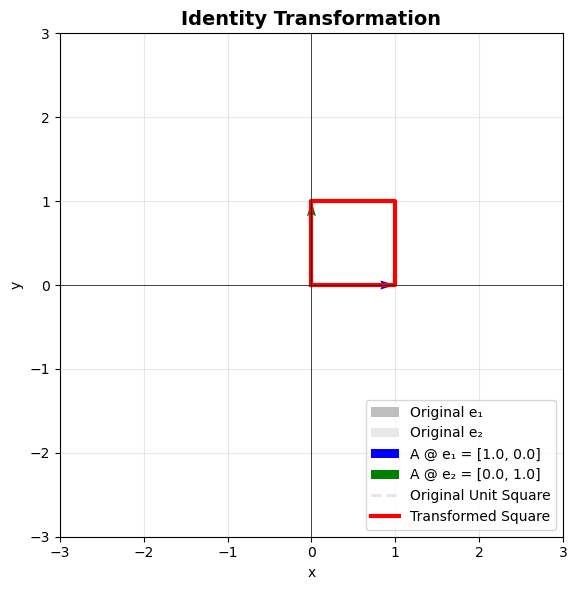

In [2]:
A = np.array([[1, 0],[0, 1]])
plot_transformation(A, "Identity Transformation")

## 2. Scaling Transformation

$$S = \begin{bmatrix} s_x & 0 \\ 0 & s_y \end{bmatrix} = \begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix}$$

**Concept**: Scaling stretches or compresses space along the coordinate axes independently.

**Matrix Pattern**: 
- Diagonal matrix (zeros off the diagonal)
- $s_x$ = scaling factor for x-direction
- $s_y$ = scaling factor for y-direction

**Effects**:
- $s > 1$: Stretches (magnifies) along that axis
- $0 < s < 1$: Compresses (shrinks) along that axis  
- $s < 0$: Reflects and scales along that axis

**Properties**:
- $\det(S) = s_x \cdot s_y = 3 \cdot 2 = 6$ (area is scaled by factor of 6)
- Preserves axes directions (no rotation)
- Transforms: $\vec{e}_1 \rightarrow [3, 0]$, $\vec{e}_2 \rightarrow [0, 2]$

Matrix A = 
[[3 0]
 [0 2]]
det(A) = 6.000
Original e1 = [1 0] → Transformed = [3 0]
Original e2 = [0 1] → Transformed = [0 2]



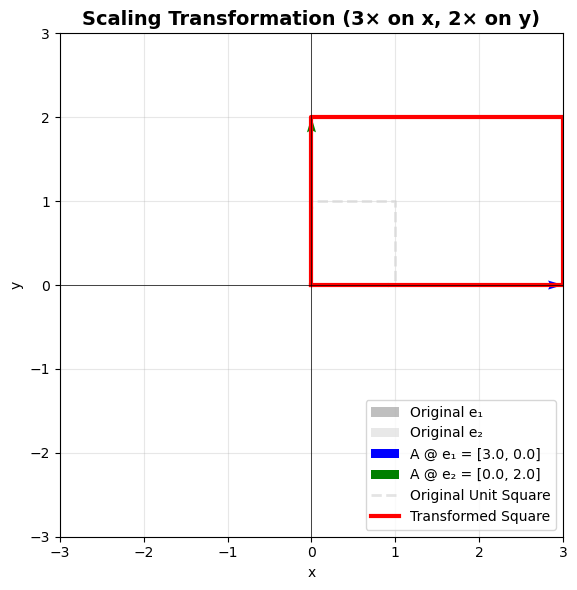

In [4]:
A = np.array([[3, 0],[0, 2]])
plot_transformation(A, "Scaling Transformation (3× on x, 2× on y)")

## 3. Reflection Transformation

$$R_y = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}$$

**Concept**: Reflection flips space across a mirror line (in this case, the y-axis).

**Matrix Pattern**: 
- One diagonal element is -1 (flips that axis)
- Other diagonal element is +1 (preserves that axis)
- Off-diagonal elements are 0 (no axis mixing)

**Geometric Meaning**:
- Every point $(x, y)$ becomes $(-x, y)$
- Points on the y-axis (mirror line) stay fixed
- Distance from mirror line is preserved

**Properties**:
- $\det(R_y) = (-1) \cdot 1 = -1$ (orientation is flipped)
- Transforms: $\vec{e}_1 \rightarrow [-1, 0]$, $\vec{e}_2 \rightarrow [0, 1]$
- Applying twice returns to original: $R_y^2 = I$

Matrix A = 
[[-1  0]
 [ 0  1]]
det(A) = -1.000
Original e1 = [1 0] → Transformed = [-1  0]
Original e2 = [0 1] → Transformed = [0 1]



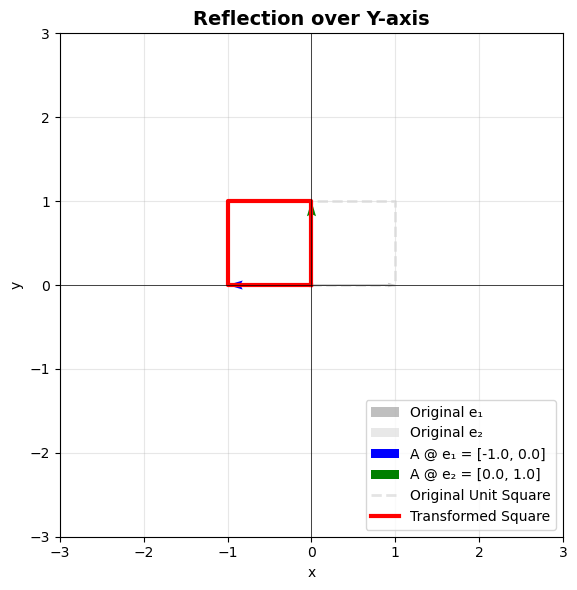

In [5]:
A = np.array([[-1, 0],[0, 1]])
plot_transformation(A, "Reflection over Y-axis")

## 4. Inversion (Point Reflection)

$$N = \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix} = -I$$

**Concept**: Inversion is a 180° rotation around the origin, flipping both x and y coordinates.

**Matrix Pattern**: 
- Both diagonal elements are -1
- Off-diagonal elements are 0
- Equivalent to $-1 \times \text{Identity}$

**Geometric Meaning**:
- Every point $(x, y)$ becomes $(-x, -y)$
- Origin stays fixed (center of rotation)
- Same as rotating 180° or reflecting through origin

**Properties**:
- $\det(N) = (-1) \cdot (-1) = 1$ (area preserved, orientation maintained after full rotation)
- Transforms: $\vec{e}_1 \rightarrow [-1, 0]$, $\vec{e}_2 \rightarrow [0, -1]$
- Applying twice returns to original: $N^2 = I$

Matrix A = 
[[-1  0]
 [ 0 -1]]
det(A) = 1.000
Original e1 = [1 0] → Transformed = [-1  0]
Original e2 = [0 1] → Transformed = [ 0 -1]



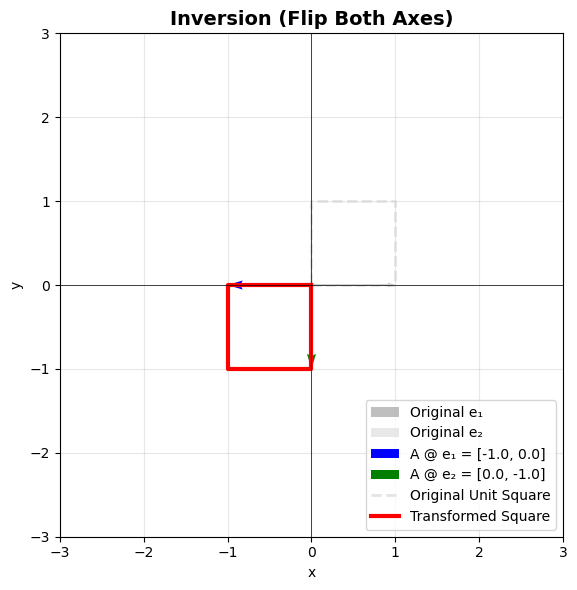

In [7]:
A = np.array([[-1, 0],[0, -1]])
plot_transformation(A, "Inversion (Flip Both Axes)")

## 5. Shear Transformation

$$H = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$$

**Concept**: Shearing "slants" space by making one coordinate depend on the other.

**Matrix Pattern**: 
- Diagonal elements are 1 (preserve lengths along axes)
- One off-diagonal element is non-zero (creates the shear)
- Creates a "parallelogram effect"

**Mathematical Effect**:
- Horizontal shear: $x' = x + ky$, $y' = y$
- The x-coordinate becomes dependent on y-coordinate
- Vertical lines become slanted, horizontal lines stay horizontal

**Properties**:
- $\det(H) = 1 \cdot 1 - 1 \cdot 0 = 1$ (area is preserved!)
- Transforms: $\vec{e}_1 \rightarrow [1, 0]$, $\vec{e}_2 \rightarrow [1, 1]$
- Rectangles become parallelograms with same area

Matrix A = 
[[1 1]
 [0 1]]
det(A) = 1.000
Original e1 = [1 0] → Transformed = [1 0]
Original e2 = [0 1] → Transformed = [1 1]



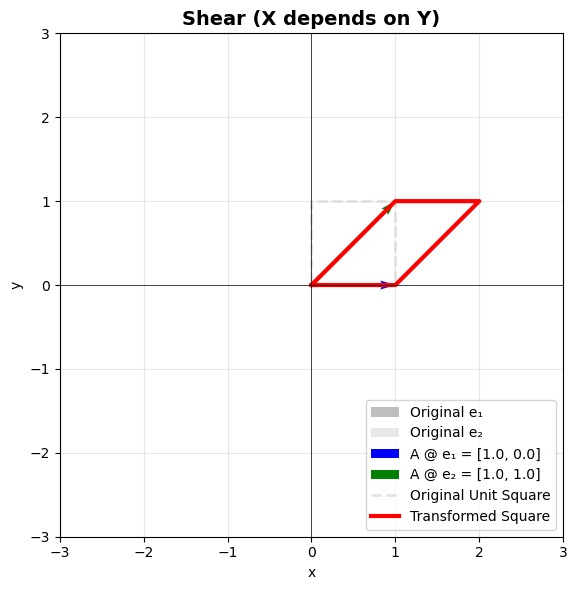

In [8]:
A = np.array([[1, 1],[0, 1]])
plot_transformation(A, "Shear (X depends on Y)")

## 6. Rotation by 90° Counterclockwise

$$R_{90°} = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

**Concept**: Rotates the entire plane 90° counterclockwise around the origin.

**Matrix Pattern**: 
- Special case of rotation matrix with $\cos(90°) = 0$, $\sin(90°) = 1$
- Anti-symmetric pattern: off-diagonal elements are negatives of each other
- Diagonal elements are zero

**Geometric Effect**:
- $(x, y) \rightarrow (-y, x)$
- Positive x-axis rotates to positive y-axis
- Positive y-axis rotates to negative x-axis

**Properties**:
- $\det(R_{90°}) = 0 \cdot 0 - (-1) \cdot 1 = 1$ (area and orientation preserved)
- Transforms: $\vec{e}_1 \rightarrow [0, 1]$, $\vec{e}_2 \rightarrow [-1, 0]$
- Four applications return to original: $R_{90°}^4 = I$

Matrix A = 
[[ 0 -1]
 [ 1  0]]
det(A) = 1.000
Original e1 = [1 0] → Transformed = [0 1]
Original e2 = [0 1] → Transformed = [-1  0]



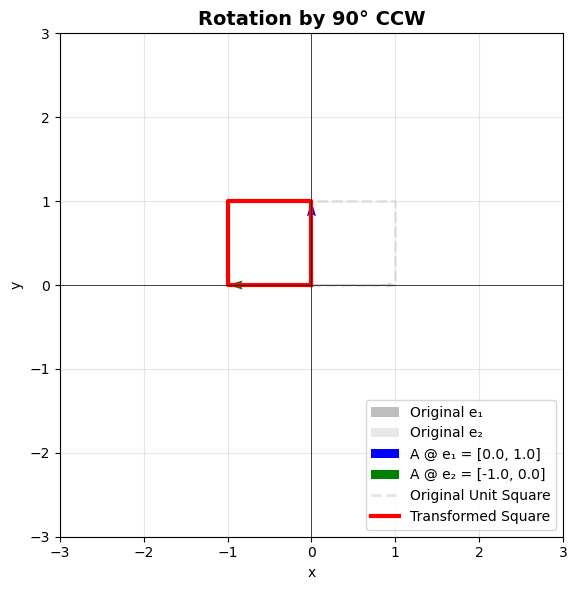

In [9]:
A = np.array([[0, -1],[1, 0]])
plot_transformation(A, "Rotation by 90° CCW")

## 7. General Rotation by Angle θ

**General rotation matrix for angle θ (counterclockwise):**

$$R_θ = \begin{bmatrix} \cos θ & -\sin θ \\ \sin θ & \cos θ \end{bmatrix}$$

**For θ = 45° (π/4 radians):**

$$R_{45°} = \begin{bmatrix} \cos(π/4) & -\sin(π/4) \\ \sin(π/4) & \cos(π/4) \end{bmatrix} = \begin{bmatrix} \frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} \\ \frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \end{bmatrix}$$

**Matrix Pattern**: 
- Diagonal elements: $\cos θ$ (same value)
- Off-diagonal: $\sin θ$ and $-\sin θ$ (anti-symmetric)
- All rotation matrices have this structure

**Properties**:
- $\det(R_θ) = \cos^2 θ + \sin^2 θ = 1$ (always preserves area)
- Orthogonal matrix: $R_θ^T = R_θ^{-1}$
- Transforms: $\vec{e}_1 \rightarrow [\cos θ, \sin θ]$, $\vec{e}_2 \rightarrow [-\sin θ, \cos θ]$

Matrix A = 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
det(A) = 1.000
Original e1 = [1 0] → Transformed = [0.70710678 0.70710678]
Original e2 = [0 1] → Transformed = [-0.70710678  0.70710678]



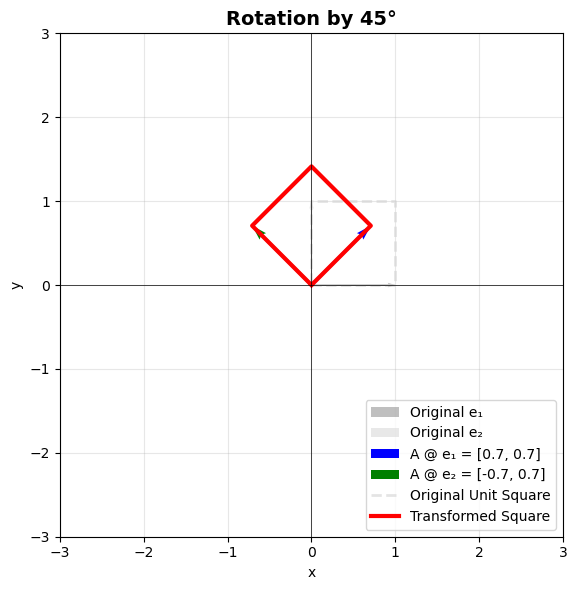

In [23]:
# Define the rotation angle
theta = np.pi / 4  # 45 degrees in radians

# Create the rotation matrix for 45 degrees
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

plot_transformation(A, "Rotation by 45°")

## ✅ Summary of Matrix Transformation Types

| Transformation | Matrix Form | Effect | Determinant | Key Property |
|---------------|-------------|--------|-------------|--------------|
| **Identity** | $\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ | No change | 1 | Preserves everything |
| **Scaling** | $\begin{bmatrix} s_x & 0 \\ 0 & s_y \end{bmatrix}$ | Stretch/compress axes | $s_x \cdot s_y$ | Diagonal matrix |
| **Reflection** | $\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}$ | Mirror across axis | -1 | Flips orientation |
| **Inversion** | $\begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix}$ | 180° rotation | 1 | Point reflection |
| **Shear** | $\begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix}$ | Slant space | 1 | Preserves area |
| **Rotation** | $\begin{bmatrix} \cos θ & -\sin θ \\ \sin θ & \cos θ \end{bmatrix}$ | Rotate around origin | 1 | Preserves distances |

---

## 🔍 Pattern Recognition Tips

**Diagonal matrices** ($\begin{bmatrix} a & 0 \\ 0 & b \end{bmatrix}$): Scale along axes
- If $a = b = 1$: Identity
- If $a$ or $b < 0$: Includes reflection
- If $a = b = -1$: Inversion

**Off-diagonal elements**: Create mixing between coordinates
- In shear: One off-diagonal non-zero
- In rotation: Both off-diagonals non-zero, anti-symmetric pattern

**Determinant interpretation**:
- $|\det| > 1$: Expands area
- $|\det| < 1$: Contracts area  
- $\det = 0$: Collapses to lower dimension
- $\det < 0$: Flips orientation

Understanding these patterns helps you quickly identify and predict transformation behavior!